In [1]:
from google.colab import drive
drive.mount('/content/drive')

import os, shutil

!unzip 'drive/My Drive/dataset/dogs-vs-cats.zip'
!unzip 'test1.zip'
!unzip 'train.zip'

!mkdir test1/images
!mkdir train/{dog,cat}

!find train -maxdepth 1 -type f | grep 'dog' | xargs -I{} mv {} train/dog
!find train -maxdepth 1 -type f | grep 'cat' | xargs -I{} mv {} train/cat
!find test1 -maxdepth 1 -type f | xargs -I{} mv {} test1/images

Streaming output truncated to the last 5000 lines.
  inflating: train/dog.5499.jpg      
  inflating: train/dog.55.jpg        
  inflating: train/dog.550.jpg       
  inflating: train/dog.5500.jpg      
  inflating: train/dog.5501.jpg      
  inflating: train/dog.5502.jpg      
  inflating: train/dog.5503.jpg      
  inflating: train/dog.5504.jpg      
  inflating: train/dog.5505.jpg      
  inflating: train/dog.5506.jpg      
  inflating: train/dog.5507.jpg      
  inflating: train/dog.5508.jpg      
  inflating: train/dog.5509.jpg      
  inflating: train/dog.551.jpg       
  inflating: train/dog.5510.jpg      
  inflating: train/dog.5511.jpg      
  inflating: train/dog.5512.jpg      
  inflating: train/dog.5513.jpg      
  inflating: train/dog.5514.jpg      
  inflating: train/dog.5515.jpg      
  inflating: train/dog.5516.jpg      
  inflating: train/dog.5517.jpg      
  inflating: train/dog.5518.jpg      
  inflating: train/dog.5519.jpg      
  inflating: train/dog.552.jpg       

In [2]:
base_dir = os.path.join('data', 'baseline')
train_dir = os.path.join(base_dir, 'train')
train_cats_dir = os.path.join(train_dir, 'cat')
train_dogs_dir = os.path.join(train_dir, 'dog')
validation_dir = os.path.join(base_dir,'val')
validation_cats_dir = os.path.join(validation_dir, 'cat')
validation_dogs_dir = os.path.join(validation_dir, 'dog')
test_dir = os.path.join(base_dir, 'test')
test_dir_cat = os.path.join(test_dir, 'cat')
test_dir_dog = os.path.join(test_dir, 'dog')

In [3]:
shutil.rmtree("data/baseline/val/.ipynb_checkpoints")
shutil.rmtree("data/baseline/train/.ipynb_checkpoints")
shutil.rmtree("data/baseline/test/.ipynb_checkpoints")
shutil.rmtree("data/baseline/.ipynb_checkpoints")
shutil.rmtree("data/.ipynb_checkpoints")

In [4]:
original = 'train/cat'
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original,fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2500)]
for fname in fnames:
    src = os.path.join(original, fname)
    dst = os.path.join(test_dir_cat, fname)
    shutil.copyfile(src, dst)

original = 'train/dog'
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original,fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2500)]
for fname in fnames:
    src = os.path.join(original, fname)
    dst = os.path.join(test_dir_dog, fname)
    shutil.copyfile(src, dst)

In [5]:
from keras import layers
from keras import models
from keras import optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [7]:
from keras.preprocessing.image import ImageDataGenerator
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(
    rescale=1./255,)


train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary',
        shuffle = False)

validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary',
        shuffle = False)

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        class_mode='binary',
        batch_size=1,
        shuffle = False)

history = model.fit(
      train_generator,
      steps_per_epoch=2000//train_generator.batch_size,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=1000//validation_generator.batch_size)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/30
62/62 [==============================] - 38s 409ms/step - loss: 0.7496 - acc: 0.4278 - val_loss: 0.6925 - val_acc: 0.5282
Epoch 2/30
62/62 [==============================] - 33s 538ms/step - loss: 0.7281 - acc: 0.5285 - val_loss: 0.6912 - val_acc: 0.4970
Epoch 3/30
62/62 [==============================] - 22s 349ms/step - loss: 0.7021 - acc: 0.4436 - val_loss: 0.6917 - val_acc: 0.4960
Epoch 4/30
62/62 [==============================] - 18s 297ms/step - loss: 0.7016 - acc: 0.4766 - val_loss: 0.6917 - val_acc: 0.5131
Epoch 5/30
62/62 [==============================] - 18s 296ms/step - loss: 0.6955 - acc: 0.5158 - val_loss: 0.6911 - val_acc: 0.4960
Epoch 6/30
62/62 [==============================] - 17s 273ms/step - loss: 0.6966 - acc: 0.4573 - val_loss: 0.6909 - val_acc: 0.4970
Epoch 7/30
62/62 [==============================] - 17s 281ms/step - loss: 0

In [8]:
model.save('equal_cats_and_dogs.keras')

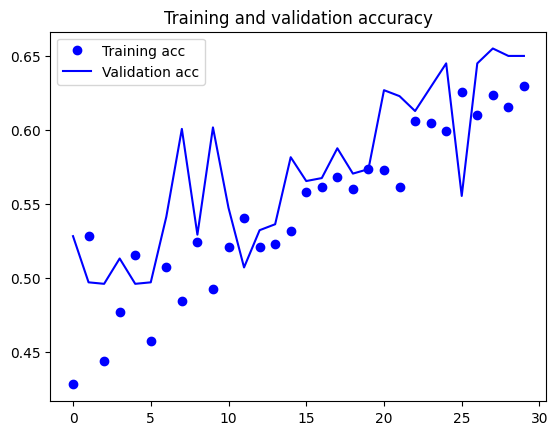

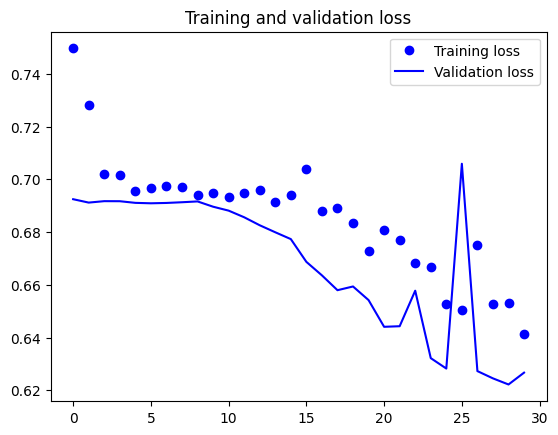

In [9]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [11]:
import numpy as np
y_predict = model.predict_generator(test_generator)
y_predict = np.where(y_predict > 0.5, 1, 0)

<ipython-input-11-a8aee0f070c2>:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_predict = model.predict_generator(test_generator)


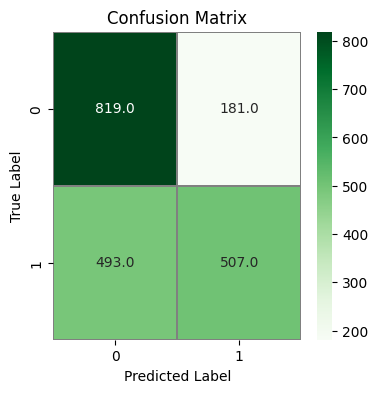

<Figure size 640x480 with 0 Axes>

In [12]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

cm = confusion_matrix(np.array(train_generator.classes), y_predict)
f,ax = plt.subplots(figsize=(4, 4))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
plt.savefig('confusion_matrix_equal.png')

In [13]:
print(classification_report(np.array(train_generator.classes), y_predict))

              precision    recall  f1-score   support

           0       0.62      0.82      0.71      1000
           1       0.74      0.51      0.60      1000

    accuracy                           0.66      2000
   macro avg       0.68      0.66      0.65      2000
weighted avg       0.68      0.66      0.65      2000



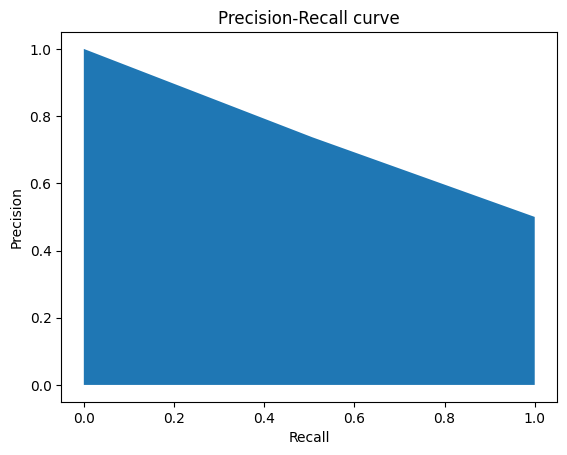

In [14]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(train_generator.classes, y_predict)
plt.fill_between(recall, precision)
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.title("Precision-Recall curve")
plt.savefig('P_R_equal.png')
plt.show()

In [15]:
from sklearn.metrics import roc_curve

y_pred_keras = model.predict(test_generator).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(test_generator.labels, y_predict)

2000/2000 [==============================] - 8s 4ms/step


In [16]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

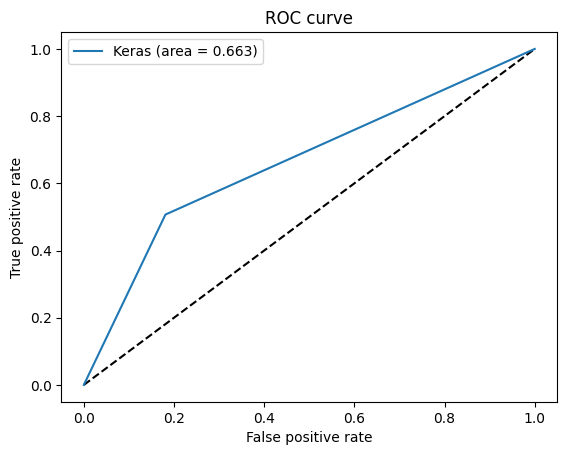

<Figure size 640x480 with 0 Axes>

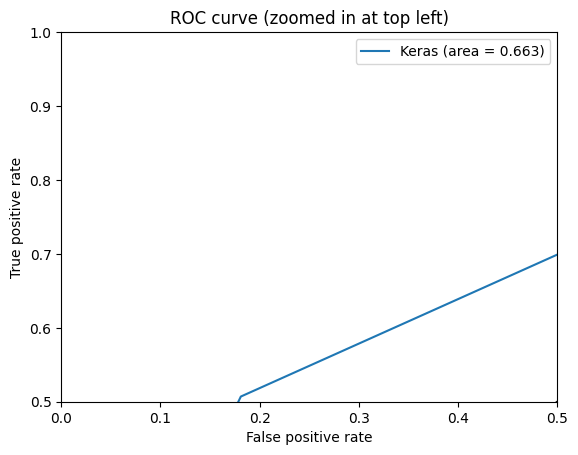

In [17]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
plt.savefig('ROC_equal.png')
# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.5)
plt.ylim(0.5, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()

In [18]:
##########  Cause Rare Events: Cats = 10% ############

In [19]:
ten_train_dir = os.path.join('data', 'ten','train')
ten_train_cats_dir = os.path.join(ten_train_dir, 'cat')
ten_train_dogs_dir = os.path.join(ten_train_dir, 'dog')
ten_validation_dir = os.path.join('data','ten', 'val')
ten_validation_cats_dir = os.path.join(ten_validation_dir, 'cat')
ten_validation_dogs_dir = os.path.join(ten_validation_dir, 'dog')
ten_test_dir = os.path.join('data', 'ten','test')
ten_test_dir_cat = os.path.join(ten_test_dir, 'cat')
ten_test_dir_dog = os.path.join(ten_test_dir, 'dog')

In [20]:
shutil.rmtree("data/ten/val/.ipynb_checkpoints")

shutil.rmtree("data/ten/train/.ipynb_checkpoints")

shutil.rmtree("data/ten/test/.ipynb_checkpoints")

shutil.rmtree("data/ten/.ipynb_checkpoints")

In [21]:
#Copy files so new dataset have 10% cats, but same total (2000 train, 1000 val, 2000 test)
original = 'train/cat'
fnames = ['cat.{}.jpg'.format(i) for i in range(200)]
for fname in fnames:
    src = os.path.join(original,fname)
    dst = os.path.join(ten_train_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(200, 300)]
for fname in fnames:
    src = os.path.join(original, fname)
    dst = os.path.join(ten_validation_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(300, 500)]
for fname in fnames:
    src = os.path.join(original, fname)
    dst = os.path.join(ten_test_dir_cat, fname)
    shutil.copyfile(src, dst)

original = 'train/dog'
fnames = ['dog.{}.jpg'.format(i) for i in range(1800)]
for fname in fnames:
    src = os.path.join(original,fname)
    dst = os.path.join(ten_train_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1800, 2700)]
for fname in fnames:
    src = os.path.join(original, fname)
    dst = os.path.join(ten_validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(2700, 4500)]
for fname in fnames:
    src = os.path.join(original, fname)
    dst = os.path.join(ten_test_dir_dog, fname)
    shutil.copyfile(src, dst)

In [22]:
from keras import layers
from keras import models
from keras import optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 17, 17, 128)      

In [24]:
from keras.preprocessing.image import ImageDataGenerator
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255,)


train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        ten_train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary',
        shuffle = False)

validation_generator = validation_datagen.flow_from_directory(
        ten_validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary',
        shuffle = False)

test_generator = test_datagen.flow_from_directory(
        ten_test_dir,
        target_size=(150, 150),
        class_mode='binary',
        batch_size=1,
        shuffle = False)

history = model.fit(
      train_generator,
      steps_per_epoch=2000//train_generator.batch_size,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=1000//validation_generator.batch_size)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/30
62/62 [==============================] - 18s 260ms/step - loss: 0.4310 - acc: 0.8811 - val_loss: 0.3300 - val_acc: 0.8992
Epoch 2/30
62/62 [==============================] - 17s 279ms/step - loss: 0.3834 - acc: 0.8992 - val_loss: 0.3480 - val_acc: 0.8992
Epoch 3/30
62/62 [==============================] - 16s 262ms/step - loss: 0.3969 - acc: 0.8984 - val_loss: 0.3205 - val_acc: 0.8992
Epoch 4/30
62/62 [==============================] - 19s 313ms/step - loss: 0.2956 - acc: 0.9146 - val_loss: 0.5104 - val_acc: 0.8992
Epoch 5/30
62/62 [==============================] - 16s 260ms/step - loss: 0.4165 - acc: 0.8984 - val_loss: 0.3231 - val_acc: 0.8992
Epoch 6/30
62/62 [==============================] - 17s 279ms/step - loss: 0.3458 - acc: 0.8984 - val_loss: 0.4664 - val_acc: 0.8992
Epoch 7/30
62/62 [==============================] - 17s 279ms/step - loss: 0

In [25]:
model.save('10%_cats_and_dogs.keras')

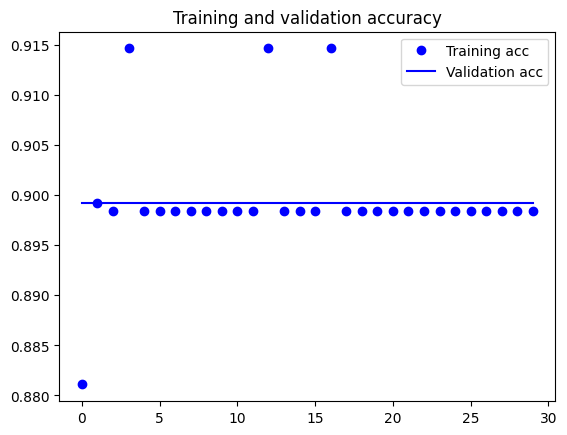

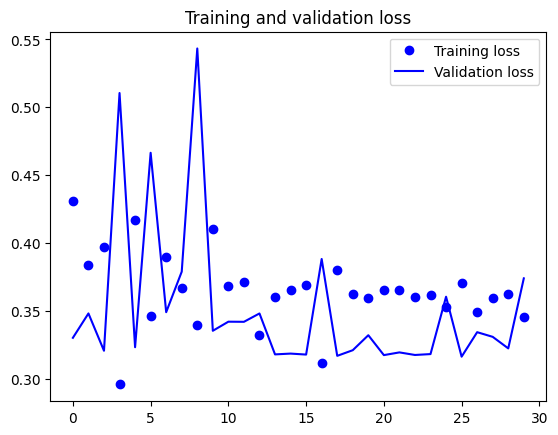

In [26]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [27]:
y_predict = model.predict_generator(test_generator)
y_predict = np.where(y_predict > 0.5, 1, 0)

<ipython-input-27-94834e98e09e>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_predict = model.predict_generator(test_generator)


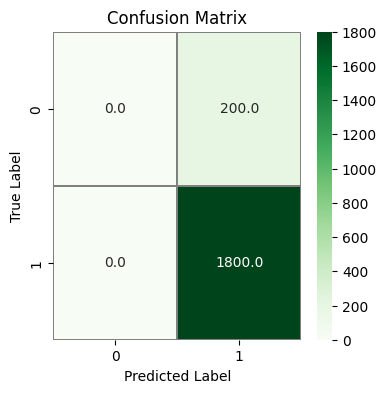

<Figure size 640x480 with 0 Axes>

In [28]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

cm = confusion_matrix(np.array(train_generator.classes), y_predict)
f,ax = plt.subplots(figsize=(4, 4))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
plt.savefig('confusion_matrix_ten.png')

In [29]:
print(classification_report(np.array(train_generator.classes), y_predict))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       200
           1       0.90      1.00      0.95      1800

    accuracy                           0.90      2000
   macro avg       0.45      0.50      0.47      2000
weighted avg       0.81      0.90      0.85      2000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


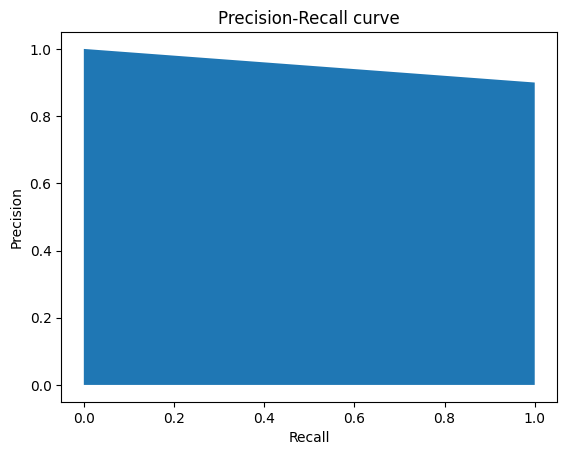

<Figure size 640x480 with 0 Axes>

In [30]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(train_generator.classes, y_predict)
plt.fill_between(recall, precision)
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.title("Precision-Recall curve")
plt.show()
plt.savefig('P_R_ten.png')

In [31]:
from sklearn.metrics import roc_curve

y_pred_keras = model.predict(test_generator).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(test_generator.labels, y_predict)

2000/2000 [==============================] - 7s 3ms/step


In [32]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

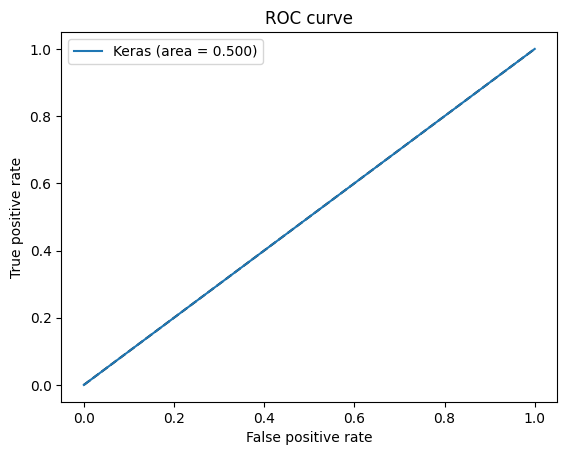

<Figure size 640x480 with 0 Axes>

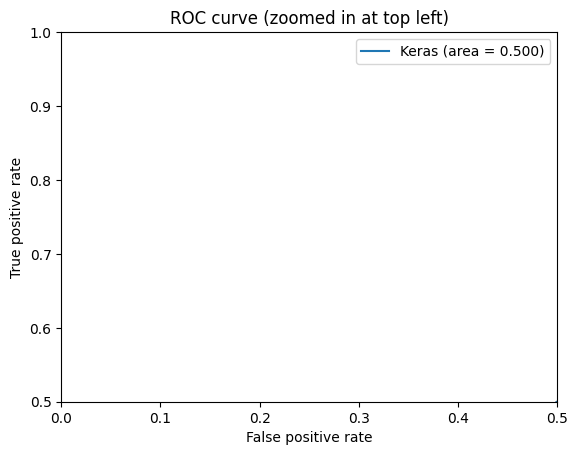

In [33]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
plt.savefig('ROC_ten.png')
# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.5)
plt.ylim(0.5, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()

The model predicts every animal will be a dog, even when 10% are cats in the train, val, and test sets. This creates higher accuracy than the baseline model (90% vs. ~70%), but it will never get better than 90% if it does not take into account the rare events.

This performance is also reflected in the ROC, Confusion Matrix, and Recall Precision curves. The confusion matrix clearly shows the predictions as all dogs, and the ROC is a straight line because the prediction is the same regardless of the input.

In [34]:
####### Rare Event: Cats = 1%  ######

In [35]:
one_train_dir = os.path.join('data', 'one','train')
one_train_cats_dir = os.path.join(one_train_dir, 'cat')
one_train_dogs_dir = os.path.join(one_train_dir, 'dog')
one_validation_dir = os.path.join('data','one', 'val')
one_validation_cats_dir = os.path.join(one_validation_dir, 'cat')
one_validation_dogs_dir = os.path.join(one_validation_dir, 'dog')
one_test_dir = os.path.join('data', 'one','test')
one_test_dir_cat = os.path.join(one_test_dir, 'cat')
one_test_dir_dog = os.path.join(one_test_dir, 'dog')

In [36]:
shutil.rmtree("data/one/val/.ipynb_checkpoints")
shutil.rmtree("data/one/train/.ipynb_checkpoints")
shutil.rmtree("data/one/test/.ipynb_checkpoints")
shutil.rmtree("data/one/.ipynb_checkpoints")

In [37]:
#Copy files so new dataset have 10% cats, but same total (2000 train, 1000 val, 2000 test)
original = 'train/cat'
fnames = ['cat.{}.jpg'.format(i) for i in range(20)]
for fname in fnames:
    src = os.path.join(original,fname)
    dst = os.path.join(one_train_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(20, 30)]
for fname in fnames:
    src = os.path.join(original, fname)
    dst = os.path.join(one_validation_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(30, 50)]
for fname in fnames:
    src = os.path.join(original, fname)
    dst = os.path.join(one_test_dir_cat, fname)
    shutil.copyfile(src, dst)

original = 'train/dog'
fnames = ['dog.{}.jpg'.format(i) for i in range(1980)]
for fname in fnames:
    src = os.path.join(original,fname)
    dst = os.path.join(one_train_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1980, 2970)]
for fname in fnames:
    src = os.path.join(original, fname)
    dst = os.path.join(one_validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(2970, 4950)]
for fname in fnames:
    src = os.path.join(original, fname)
    dst = os.path.join(one_test_dir_dog, fname)
    shutil.copyfile(src, dst)

In [38]:
from keras import layers
from keras import models
from keras import optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [39]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 17, 17, 128)      

In [40]:
from keras.preprocessing.image import ImageDataGenerator
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255,)


train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        one_train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary',
        shuffle = False)

validation_generator = validation_datagen.flow_from_directory(
        one_validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary',
        shuffle = False)

test_generator = test_datagen.flow_from_directory(
        one_test_dir,
        target_size=(150, 150),
        class_mode='binary',
        batch_size=1,
        shuffle = False)

history = model.fit(
      train_generator,
      steps_per_epoch=2000//train_generator.batch_size,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=1000//validation_generator.batch_size)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/30
62/62 [==============================] - 19s 260ms/step - loss: 0.1220 - acc: 0.9817 - val_loss: 0.0634 - val_acc: 0.9899
Epoch 2/30
62/62 [==============================] - 16s 257ms/step - loss: 0.0926 - acc: 0.9898 - val_loss: 0.0617 - val_acc: 0.9899
Epoch 3/30
62/62 [==============================] - 17s 273ms/step - loss: 0.0847 - acc: 0.9898 - val_loss: 0.0665 - val_acc: 0.9899
Epoch 4/30
62/62 [==============================] - 17s 267ms/step - loss: 0.0794 - acc: 0.9898 - val_loss: 0.0808 - val_acc: 0.9899
Epoch 5/30
62/62 [==============================] - 16s 259ms/step - loss: 0.1071 - acc: 0.9898 - val_loss: 0.0694 - val_acc: 0.9899
Epoch 6/30
62/62 [==============================] - 16s 259ms/step - loss: 0.0769 - acc: 0.9898 - val_loss: 0.0838 - val_acc: 0.9899
Epoch 7/30
62/62 [==============================] - 16s 261ms/step - loss: 0

In [41]:
model.save('1%_cats_and_dogs.keras')

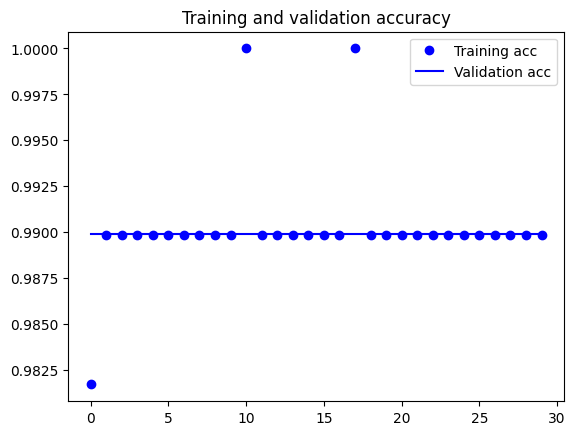

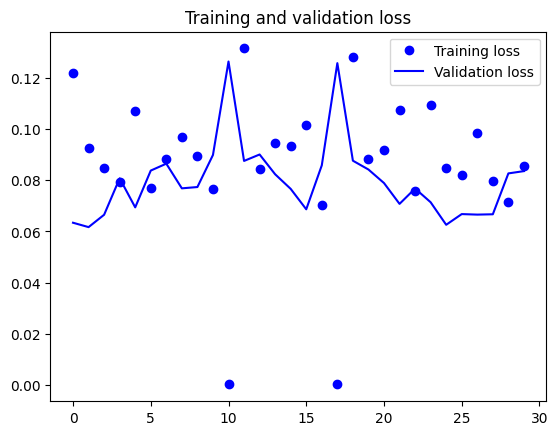

In [42]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [43]:
y_predict = model.predict_generator(test_generator)
y_predict = np.where(y_predict > 0.5, 1, 0)

<ipython-input-43-94834e98e09e>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_predict = model.predict_generator(test_generator)


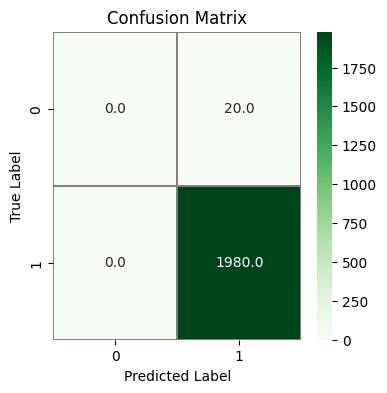

<Figure size 640x480 with 0 Axes>

In [44]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

cm = confusion_matrix(np.array(train_generator.classes), y_predict)
f,ax = plt.subplots(figsize=(4, 4))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
plt.savefig('1_confusion_matrix.png')

In [45]:
print(classification_report(np.array(train_generator.classes), y_predict))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        20
           1       0.99      1.00      0.99      1980

    accuracy                           0.99      2000
   macro avg       0.49      0.50      0.50      2000
weighted avg       0.98      0.99      0.99      2000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


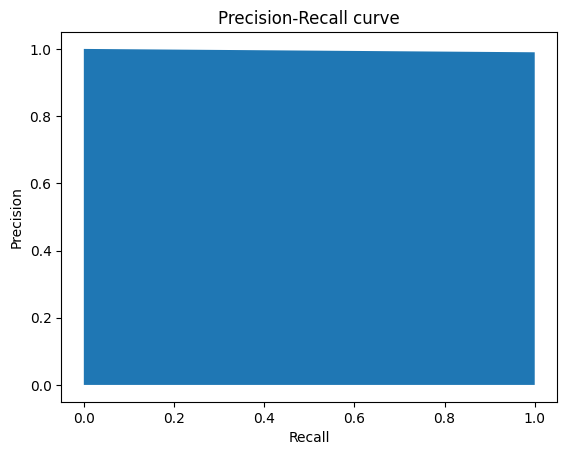

<Figure size 640x480 with 0 Axes>

In [46]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(train_generator.classes, y_predict)
plt.fill_between(recall, precision)
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.title("Precision-Recall curve")
plt.show()
plt.savefig('1_precision_recall.png')

In [47]:
from sklearn.metrics import roc_curve

y_pred_keras = model.predict(test_generator).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(test_generator.labels, y_predict)

2000/2000 [==============================] - 8s 4ms/step


In [48]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

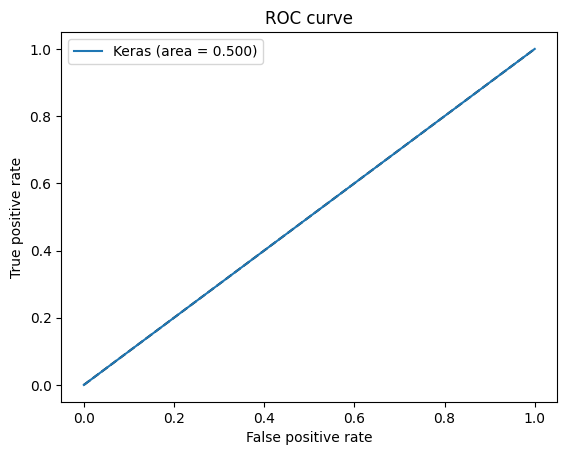

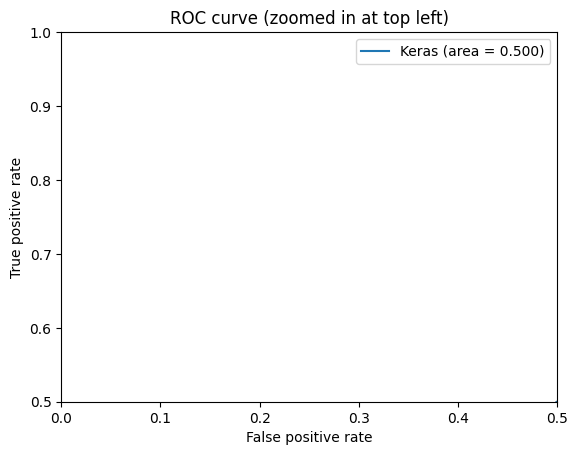

<Figure size 640x480 with 0 Axes>

In [49]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.5)
plt.ylim(0.5, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()
plt.savefig('1_ROC.png')

Similar to the model with just 10% cats, this model predicts every animal will be a dog, even when 1% are cats in the train, val, and test sets. Once again, this creates higher accuracy than the baseline model (99% vs. ~70%) due to the actual proportion of dogs in the population, but it will never get better than 99% if it does not take into account the rare events.

This performance is also reflected in the ROC, Confusion Matrix, and Recall Precision curves. The confusion matrix clearly shows the predictions as all dogs, and the ROC is a straight line because the prediction is the same regardless of the input.